%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_811895/311467187.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df= pd.read_csv("optical_potential.txt", delim_whitespace=True, skiprows=4, header=None, names=[


<Axes: xlabel='r [fm]'>

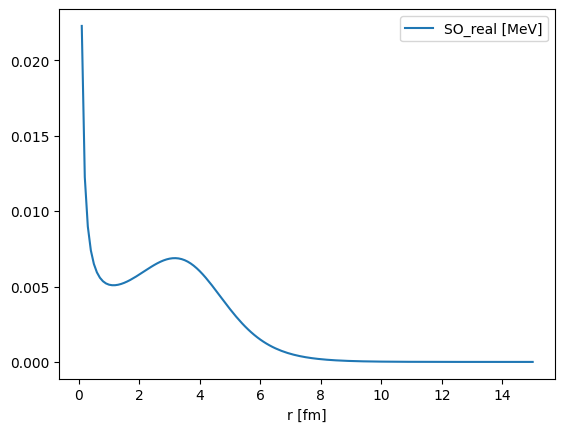

In [21]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit
df= pd.read_csv("optical_potential.txt", delim_whitespace=True, skiprows=4, header=None, names=[
    "r [fm]", "V_real [MeV]", "V_imag [MeV]", "SO_real [MeV]", "SO_imag [MeV]", "Coulomb [MeV]", "1/r^2 [1/fm^2]"
]).iloc[1:-1].astype(float)
df


# Define the Woods-Saxon potential function
def woods_saxon(r, V0=1, R=0.1, a=1):
    return V0 / (1 + np.exp((r - R) / a))

def thomas_shape(r, VSO, R, a):
    y = np.exp((r - R) / a)
    z = 1.0 + y
    return VSO * y / (r * a * z * z)
    


df.plot(x="r [fm]", y= "SO_real [MeV]")

/tmp/ipykernel_811895/4214017687.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df= pd.read_csv("opticalpotential.txt", delim_whitespace=True, header=None) #.iloc[1:-1] #.astype(float)
/home/itay/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/itay/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: xlabel='0'>

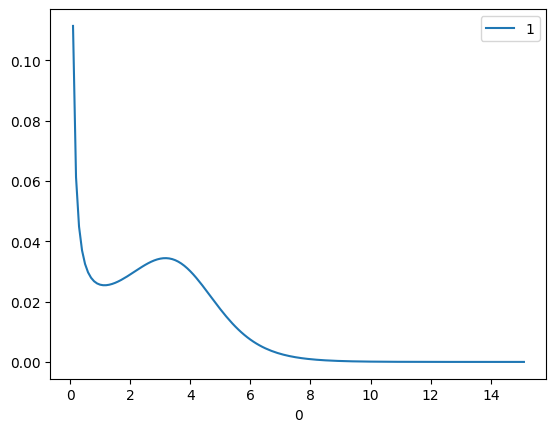

In [44]:
import ast
df= pd.read_csv("opticalpotential.txt", delim_whitespace=True, header=None) #.iloc[1:-1] #.astype(float)
df[1] = df[1].apply(lambda s: complex(*ast.literal_eval(s)))
df[0] = df[0].astype(float)
df.set_index(0, inplace=True)
df.plot()
#df[1] = df[1].apply(lambda tup: complex(tup[0], tup[1]))

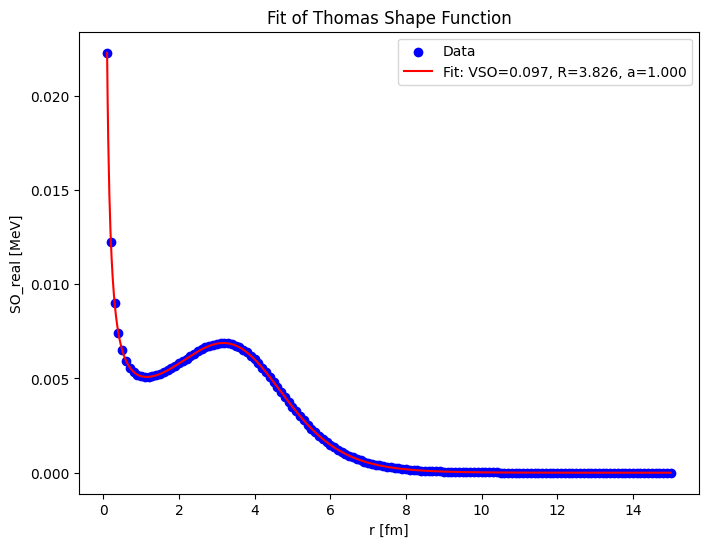

In [22]:
r_values = df["r [fm]"].values
so_real_values = df["SO_real [MeV]"].values

# Initial guesses for parameters (VSO, R, a)
initial_guess = [0.001, 1.0, 1.0]  

# Perform curve fitting
popt, pcov = curve_fit(thomas_shape, r_values, so_real_values, p0=initial_guess)

# Extract fitted parameters
VSO_fit, R_fit, a_fit = popt

# Generate fitted values
r_fit = np.linspace(min(r_values), max(r_values), 1000)
so_fit = thomas_shape(r_fit, *popt)

# Plot original data and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(r_values, so_real_values, label="Data", color="blue")
plt.plot(r_fit, so_fit, label=f"Fit: VSO={VSO_fit:.3f}, R={R_fit:.3f}, a={a_fit:.3f}", color="red")
plt.xlabel("r [fm]")
plt.ylabel("SO_real [MeV]")
plt.legend()
plt.title("Fit of Thomas Shape Function")
plt.show()

In [24]:
mFe56 = 55.9349375 # mass of Fe-56 in u
m_n = 1.00866491578 # mass of neutron in u
m_reduced = mFe56 * m_n / (mFe56 + m_n) # reduced mass in u
u = 931.5 # atomic mass unit in MeV/c^2
hbarc = 197.3 # fm * MeV
m_reduced_MeV = m_reduced * u # reduced mass in MeV/c^2
2*m_reduced_MeV / hbarc**2 


0.04741806397343381

In [26]:
2*m_reduced_MeV / hbarc**2  * 2.04553

0.09699507239957805

In [208]:
56**(1/3)


3.825862365544778

l = 0


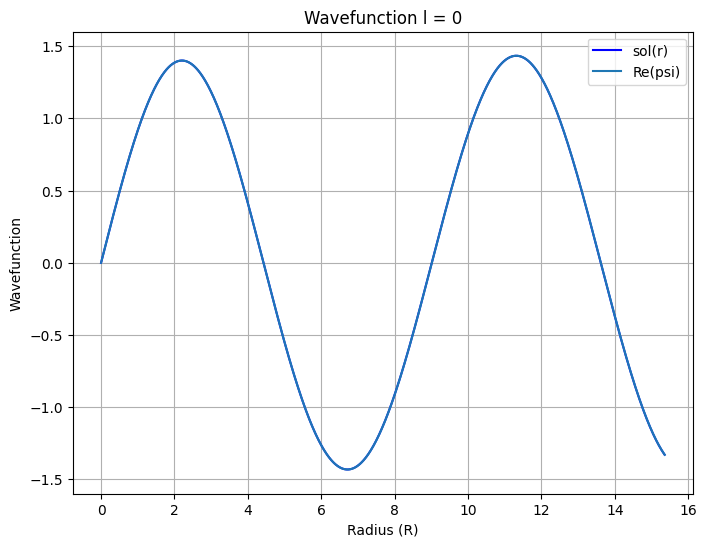

In [209]:
for l in range(0, 1):
    print(f"l = {l}")
    data = np.loadtxt(f"intwavefunction_l_{l}.dat")
    dataMAT = np.loadtxt("datau1.txt")

# Extract x and y values
    x = dataMAT[:, 0]
    y = dataMAT[:, 1]

# Plot the data

    
    data_deriv = np.loadtxt(f"intwavefunction_derivative_l_{l}.dat")
    R, Re_psi, Im_psi, Abs_psi = data.T
    R1, Re_psi_deriv, Im_psi_deriv, Abs_psi_deriv = data_deriv.T
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, linestyle='-', color='b', label="sol(r)")
    plt.plot(R, Re_psi, label="Re(psi)")
    #plt.plot(R1, Re_psi_deriv / Re_psi[6:], label="ratio")
    plt.xlabel("Radius (R)")
    plt.ylabel("Wavefunction")
    plt.legend()
    ylim(-1.6,1.6)
    plt.title(f"Wavefunction l = {l}")
    plt.grid()
    plt.show()



In [210]:
df = pd.DataFrame([Re_psi , y] , columns = R , index  = ["psi_coh" , "psi_math"]).T.iloc[:-3]

In [213]:
df.loc[15.000]

psi_coh    -1.160840
psi_math   -1.161898
Name: 15.0, dtype: float64

In [173]:
df['Op']  =woods_saxon(df.index, V0_fit, R_fit, a_fit) - V0_fit * 9.82287 #c1V - c1E

In [174]:
df['Opu_coh'] = df['Op'] * df['psi_coh']
df['Opu_math'] = df['Op'] * df['psi_math']

<Axes: >

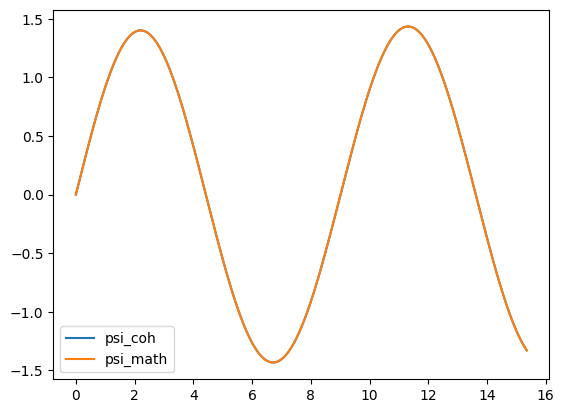

In [205]:
df.plot()

In [179]:
first_derivative = np.gradient(df['psi_math'].values, df.index.values)
second_derivative = np.gradient(first_derivative, df.index.values)
df['psi_math_second_derivative'] = second_derivative

first_derivative = np.gradient(df['psi_coh'].values, df.index.values)
second_derivative = np.gradient(first_derivative, df.index.values)
df['psi_coh_second_derivative'] = second_derivative

(-0.05, 0.05)

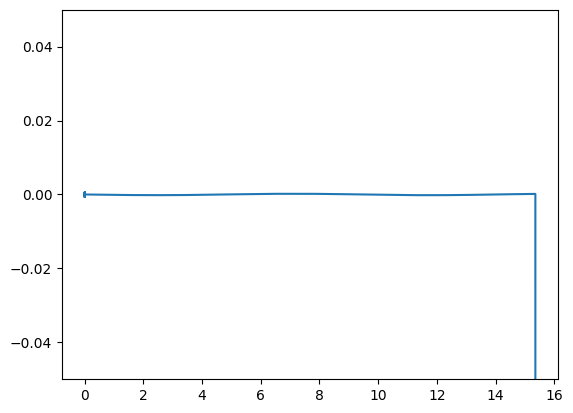

In [187]:
df.eval("psi_math_second_derivative - Opu_math").plot()
ylim(-0.05,0.05)

<Axes: >

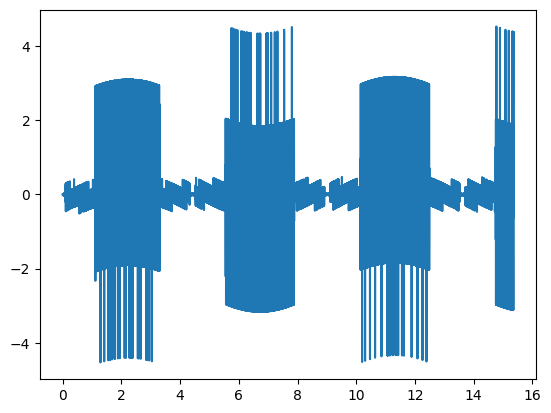

In [199]:
df.eval("psi_coh_second_derivative - Opu_coh").plot()#(marker = 'x' , linestyle = 'None')

In [151]:
df.loc[2] / df.loc[1]

psi_coh     1.511445
psi_math    1.593033
dtype: float64

<Axes: >

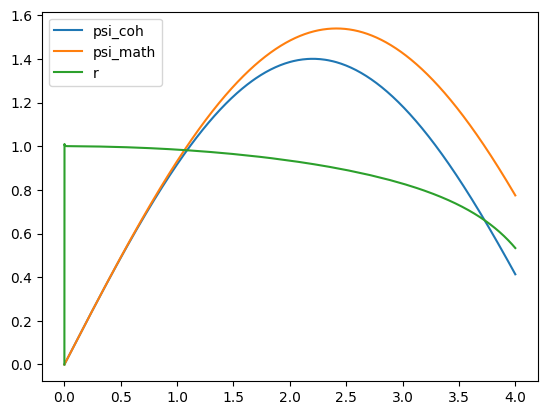

In [141]:
df.eval("r = psi_coh / psi_math").query("-5<r<5").loc[:4].plot()